## Observations and Insights 

From all of the treatments, Capomulin and Ramicane work the best

As mouse weight increases, the tumor average does as well

More mice are on the Capomulin regimen overall. The smallest test group is Zoniferol



In [207]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mousedata = pd.read_csv(mouse_metadata)
results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results_df= pd.merge(mousedata, results, how="inner", on="Mouse ID")
# Display the data table for preview
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [208]:
# Checking the number of mice
count=mouse_results_df["Mouse ID"].count()
count

1893

In [209]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_IDTIME = mouse_results_df[mouse_results_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_IDTIME

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [210]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates= mouse_results_df[mouse_results_df.duplicated(['Mouse ID',])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [211]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results=mouse_results_df.drop_duplicates("Mouse ID")
clean_mouse_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [212]:
# Checking the number of mice in the clean DataFrame.
clean_count=clean_mouse_results["Mouse ID"].count()
clean_count

249

## Summary Statistics

In [213]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol= mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_vol= mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_vol= mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
STDV_tumor_vol= mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_vol= mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats= pd.DataFrame({"Mean":mean_tumor_vol, "Median": median_tumor_vol, "Variance": variance_tumor_vol, "Standard Deviation": STDV_tumor_vol, "SEM": sem_tumor_vol})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [214]:
summary_stats= pd.DataFrame({"Mean":mean_tumor_vol, "Median": median_tumor_vol, "Variance": variance_tumor_vol, "Standard Deviation": STDV_tumor_vol, "SEM": sem_tumor_vol})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

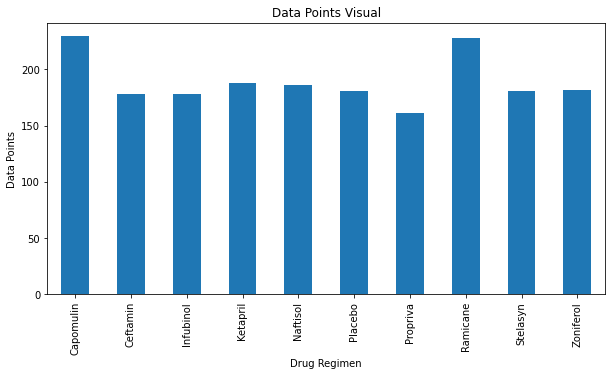

<Figure size 432x288 with 0 Axes>

In [215]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen= mouse_results_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen.plot(kind="bar", figsize=(10,5))
plt.title("Total Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

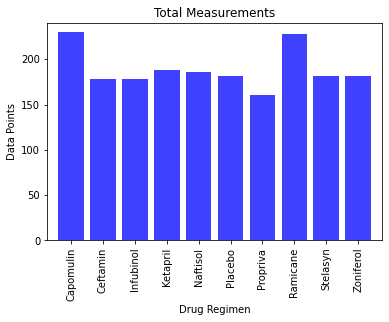

In [302]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Total Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


In [217]:
#  Group by gender 
gendergroup = mouse_results_df.groupby(["Mouse ID","Sex"])
gendergroup
gender_df = pd.DataFrame(gendergroup.size())

# Create the dataframe 
gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["Total Count"]
gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


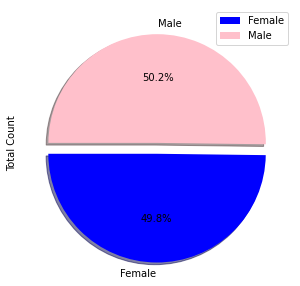

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['blue', 'pink']
explode = (0.1, 0)
plot = gender.plot.pie(y="Total Count",figsize=(5,5), colors = colors, startangle=180, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.62675808507679, 1.1259342323246222, -1.101820783218489, 1.1033910734755308)

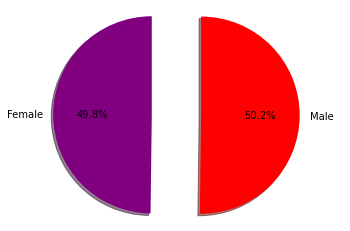

In [225]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['purple', 'red']

#Determoine which section of the circle to detach
explode = (0.5, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [299]:
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [310]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drugs = mouse_results_df.loc[mouse_results_df['Drug Regimen'].isin(drugs)]

drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [273]:
# Start by getting the last (greatest) timepoint for each mouse
tum_vol = drug_list.groupby(drug_list['Mouse ID']).agg({'Timepoint':['max']})
tum_vol.columns = ['Timepoint']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tum_vol= tumor_volume_df.reset_index()
tum_vol_final = pd.merge(tumor_volume_df, mouse_results_df, how="left", on=["Mouse ID", "Timepoint"])
tum_vol_final

# Display the data table for preview


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [311]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)
tum_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tum_vol_drug = tum_vol_final['Tumor Volume (mm3)'].loc[tum_vol_final['Drug Regimen'] == drug]
    
    # add subset 
    tum_vol_final.append(tum_vol_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tum_vol_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


NameError: name 'data_to_plot' is not defined

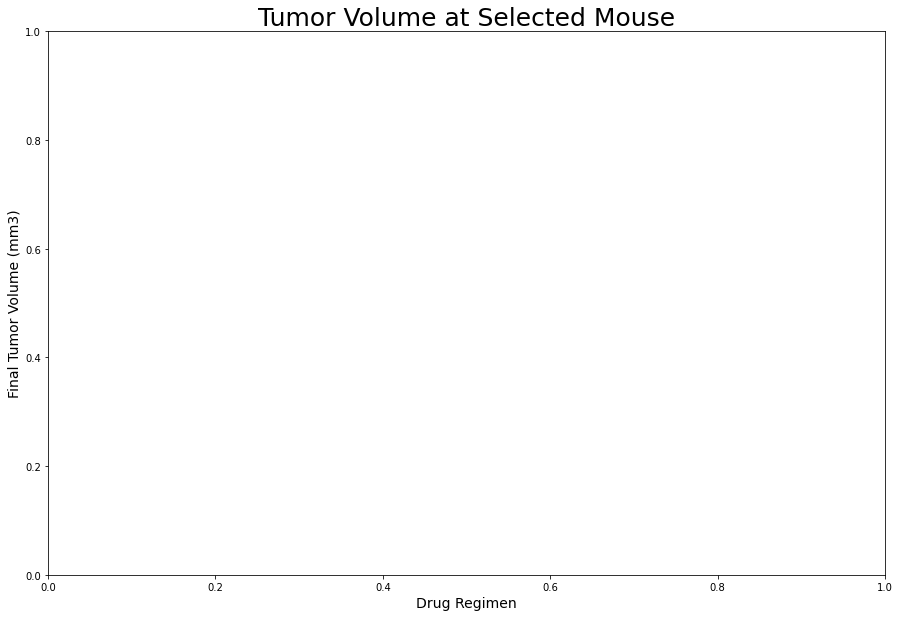

In [313]:
#BoxPlot

drugs= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

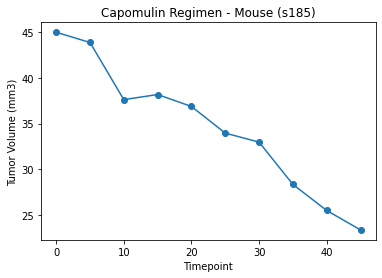

In [288]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Mouse = mouse_results_df[['Timepoint', 'Tumor Volume (mm3)']].loc[(mouse_results_df['Drug Regimen'] == 'Capomulin') & (mouse_results_df['Mouse ID']=='s185')]
Mouse

# plot data
plt.plot(Mouse['Timepoint'], Mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen - Mouse (s185)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

(35.0, 46.0)

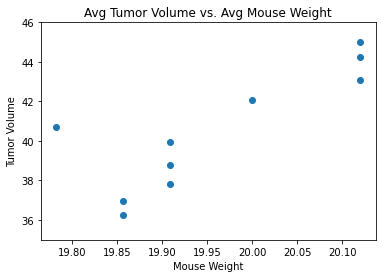

In [290]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_tumorwgt = mouse_results_df.loc[mouse_results_df['Drug Regimen'] == 'Capomulin'].groupby(mouse_results_df['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 'Weight (g)':['mean']})
cap_tumorwgt.columns = ['Average Tumor Volume {mm3}', 'Average Mouse Weight (g)']

atv = cap_tumorwgt['Average Tumor Volume {mm3}']
amw = cap_tumorwgt['Average Mouse Weight (g)']
plt.scatter(amw,atv)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

## Correlation and Regression

In [296]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
